In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Указание путей

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Количество классов
если не изменить переменную в соответствии с количеством классов в выборке, будет ошибка

In [3]:
NUM_CLASSES = 9

# Считывание датасета

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Построение модели
мы будем использовать небольшую полносвязную нейронную сеть с softmax в конце для предсказания вероятностей

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 9)                 99        
                                                                 
Total params: 1,169
Trainable params: 1,169
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Сallback чекпоинтов модели
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback для ранней остановки
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# настройки обучения
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Обучение модели

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
12/34 [=========>....................] - ETA: 0s - loss: 2.2557 - accuracy: 0.1055 
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 1s 16ms/step - loss: 2.1635 - accuracy: 0.1396 - val_loss: 1.9721 - val_accuracy: 0.3137
Epoch 2/1000
 1/34 [..............................] - ETA: 0s - loss: 1.9672 - accuracy: 0.2266
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 2ms/step - loss: 1.9497 - accuracy: 0.2479 - val_loss: 1.7808 - val_accuracy: 0.4356
Epoch 3/1000
 1/34 [..............................] - ETA: 0s - loss: 1.8658 - accuracy: 0.2734
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 3ms/step - loss: 1.7980 - accuracy: 0.3163 - val_loss: 1.6412 - val_accuracy: 0.5000
Epoch 4/1000
 1/34 [..............................] - ETA: 0s - loss: 1.7254 - accuracy: 0.3359

28/34 [=======================>......] - ETA: 0s - loss: 0.9916 - accuracy: 0.6339
Epoch 28: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 4ms/step - loss: 1.0023 - accuracy: 0.6284 - val_loss: 0.6645 - val_accuracy: 0.8158
Epoch 29/1000
14/34 [===========>..................] - ETA: 0s - loss: 1.0057 - accuracy: 0.6200
Epoch 29: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 5ms/step - loss: 0.9800 - accuracy: 0.6321 - val_loss: 0.6500 - val_accuracy: 0.8081
Epoch 30/1000
32/34 [===========================>..] - ETA: 0s - loss: 0.9867 - accuracy: 0.6274
Epoch 30: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 4ms/step - loss: 0.9902 - accuracy: 0.6251 - val_loss: 0.6402 - val_accuracy: 0.8326
Epoch 31/1000
30/34 [=========================>....] - ETA: 0s - loss: 0.9797 - accuracy: 0.6344
Epoch 31

 1/34 [..............................] - ETA: 0s - loss: 0.8510 - accuracy: 0.7188
Epoch 55: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 3ms/step - loss: 0.8486 - accuracy: 0.6907 - val_loss: 0.4585 - val_accuracy: 0.8915
Epoch 56/1000
 1/34 [..............................] - ETA: 0s - loss: 0.9650 - accuracy: 0.6953
Epoch 56: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 3ms/step - loss: 0.8319 - accuracy: 0.6979 - val_loss: 0.4536 - val_accuracy: 0.8908
Epoch 57/1000
 1/34 [..............................] - ETA: 0s - loss: 0.8339 - accuracy: 0.6953
Epoch 57: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 2ms/step - loss: 0.8586 - accuracy: 0.6914 - val_loss: 0.4519 - val_accuracy: 0.8943
Epoch 58/1000
 1/34 [..............................] - ETA: 0s - loss: 0.8118 - accuracy: 0.6875
Epoch 58

29/34 [========================>.....] - ETA: 0s - loss: 0.7741 - accuracy: 0.7174
Epoch 82: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 3ms/step - loss: 0.7848 - accuracy: 0.7131 - val_loss: 0.3781 - val_accuracy: 0.9083
Epoch 83/1000
 1/34 [..............................] - ETA: 0s - loss: 0.8765 - accuracy: 0.6875
Epoch 83: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 5ms/step - loss: 0.7961 - accuracy: 0.7127 - val_loss: 0.3777 - val_accuracy: 0.9195
Epoch 84/1000
 1/34 [..............................] - ETA: 0s - loss: 0.8826 - accuracy: 0.6953
Epoch 84: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 5ms/step - loss: 0.7723 - accuracy: 0.7197 - val_loss: 0.3707 - val_accuracy: 0.9188
Epoch 85/1000
 1/34 [..............................] - ETA: 0s - loss: 0.8134 - accuracy: 0.7188
Epoch 85

 1/34 [..............................] - ETA: 0s - loss: 0.7881 - accuracy: 0.7188
Epoch 109: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 3ms/step - loss: 0.7735 - accuracy: 0.7229 - val_loss: 0.3520 - val_accuracy: 0.9391
Epoch 110/1000
 1/34 [..............................] - ETA: 0s - loss: 0.7468 - accuracy: 0.6875
Epoch 110: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 2ms/step - loss: 0.7455 - accuracy: 0.7262 - val_loss: 0.3418 - val_accuracy: 0.9440
Epoch 111/1000
 1/34 [..............................] - ETA: 0s - loss: 0.6751 - accuracy: 0.7266
Epoch 111: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 3ms/step - loss: 0.7673 - accuracy: 0.7176 - val_loss: 0.3447 - val_accuracy: 0.9419
Epoch 112/1000
 1/34 [..............................] - ETA: 0s - loss: 0.8648 - accuracy: 0.6953
Ep

Epoch 136/1000
 1/34 [..............................] - ETA: 0s - loss: 0.6598 - accuracy: 0.7422
Epoch 136: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 8ms/step - loss: 0.7268 - accuracy: 0.7411 - val_loss: 0.3339 - val_accuracy: 0.9426
Epoch 137/1000
 1/34 [..............................] - ETA: 0s - loss: 0.7872 - accuracy: 0.7031
Epoch 137: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 3ms/step - loss: 0.7200 - accuracy: 0.7393 - val_loss: 0.3373 - val_accuracy: 0.9335
Epoch 138/1000
 1/34 [..............................] - ETA: 0s - loss: 0.7275 - accuracy: 0.7578
Epoch 138: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 3ms/step - loss: 0.7343 - accuracy: 0.7365 - val_loss: 0.3283 - val_accuracy: 0.9384
Epoch 139/1000
29/34 [========================>.....] - ETA: 0s - loss: 0.7273 - accu

Epoch 163/1000
27/34 [======================>.......] - ETA: 0s - loss: 0.7097 - accuracy: 0.7341
Epoch 163: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 8ms/step - loss: 0.7166 - accuracy: 0.7330 - val_loss: 0.3211 - val_accuracy: 0.9384
Epoch 164/1000
23/34 [===================>..........] - ETA: 0s - loss: 0.6983 - accuracy: 0.7520
Epoch 164: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 5ms/step - loss: 0.7059 - accuracy: 0.7509 - val_loss: 0.3171 - val_accuracy: 0.9433
Epoch 165/1000
29/34 [========================>.....] - ETA: 0s - loss: 0.6984 - accuracy: 0.7543
Epoch 165: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 7ms/step - loss: 0.6967 - accuracy: 0.7547 - val_loss: 0.3143 - val_accuracy: 0.9440
Epoch 166/1000
28/34 [=======================>......] - ETA: 0s - loss: 0.7128 - accu

Epoch 190/1000
34/34 [==============================] - ETA: 0s - loss: 0.7191 - accuracy: 0.7423
Epoch 190: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 3ms/step - loss: 0.7191 - accuracy: 0.7423 - val_loss: 0.3128 - val_accuracy: 0.9447
Epoch 191/1000
34/34 [==============================] - ETA: 0s - loss: 0.7092 - accuracy: 0.7509
Epoch 191: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 4ms/step - loss: 0.7092 - accuracy: 0.7509 - val_loss: 0.3009 - val_accuracy: 0.9468
Epoch 192/1000
30/34 [=========================>....] - ETA: 0s - loss: 0.6922 - accuracy: 0.7521
Epoch 192: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 4ms/step - loss: 0.6965 - accuracy: 0.7502 - val_loss: 0.3158 - val_accuracy: 0.9419
Epoch 193/1000
27/34 [======================>.......] - ETA: 0s - loss: 0.6914 - accu

Epoch 217/1000
32/34 [===========================>..] - ETA: 0s - loss: 0.7043 - accuracy: 0.7456
Epoch 217: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 7ms/step - loss: 0.7037 - accuracy: 0.7460 - val_loss: 0.2974 - val_accuracy: 0.9440
Epoch 218/1000
24/34 [====================>.........] - ETA: 0s - loss: 0.7107 - accuracy: 0.7513
Epoch 218: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 10ms/step - loss: 0.6977 - accuracy: 0.7535 - val_loss: 0.3016 - val_accuracy: 0.9433
Epoch 219/1000
24/34 [====================>.........] - ETA: 0s - loss: 0.6887 - accuracy: 0.7393
Epoch 219: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 10ms/step - loss: 0.7007 - accuracy: 0.7346 - val_loss: 0.3013 - val_accuracy: 0.9419
Epoch 220/1000
31/34 [==========================>...] - ETA: 0s - loss: 0.6749 - ac

Epoch 244/1000
27/34 [======================>.......] - ETA: 0s - loss: 0.7042 - accuracy: 0.7393
Epoch 244: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 4ms/step - loss: 0.7040 - accuracy: 0.7390 - val_loss: 0.2880 - val_accuracy: 0.9454
Epoch 245/1000
34/34 [==============================] - ETA: 0s - loss: 0.6813 - accuracy: 0.7575
Epoch 245: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 7ms/step - loss: 0.6813 - accuracy: 0.7575 - val_loss: 0.2950 - val_accuracy: 0.9440
Epoch 246/1000
26/34 [=====================>........] - ETA: 0s - loss: 0.6883 - accuracy: 0.7434
Epoch 246: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 5ms/step - loss: 0.6916 - accuracy: 0.7442 - val_loss: 0.2983 - val_accuracy: 0.9377
Epoch 247/1000
34/34 [==============================] - ETA: 0s - loss: 0.7063 - accu

Epoch 271/1000
26/34 [=====================>........] - ETA: 0s - loss: 0.6689 - accuracy: 0.7614
Epoch 271: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 12ms/step - loss: 0.6781 - accuracy: 0.7579 - val_loss: 0.2861 - val_accuracy: 0.9426
Epoch 272/1000
33/34 [============================>.] - ETA: 0s - loss: 0.6724 - accuracy: 0.7538
Epoch 272: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 13ms/step - loss: 0.6720 - accuracy: 0.7537 - val_loss: 0.2838 - val_accuracy: 0.9391
Epoch 273/1000
33/34 [============================>.] - ETA: 0s - loss: 0.6740 - accuracy: 0.7526
Epoch 273: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 5ms/step - loss: 0.6727 - accuracy: 0.7535 - val_loss: 0.2828 - val_accuracy: 0.9426
Epoch 274/1000
19/34 [===============>..............] - ETA: 0s - loss: 0.6569 - ac

Epoch 298/1000
23/34 [===================>..........] - ETA: 0s - loss: 0.6533 - accuracy: 0.7629
Epoch 298: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 4ms/step - loss: 0.6489 - accuracy: 0.7654 - val_loss: 0.2747 - val_accuracy: 0.9384
Epoch 299/1000
29/34 [========================>.....] - ETA: 0s - loss: 0.6518 - accuracy: 0.7656
Epoch 299: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 3ms/step - loss: 0.6579 - accuracy: 0.7619 - val_loss: 0.2744 - val_accuracy: 0.9454
Epoch 300/1000
27/34 [======================>.......] - ETA: 0s - loss: 0.6775 - accuracy: 0.7610
Epoch 300: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
34/34 [==============================] - 0s 6ms/step - loss: 0.6717 - accuracy: 0.7603 - val_loss: 0.2774 - val_accuracy: 0.9426
Epoch 301/1000
24/34 [====================>.........] - ETA: 0s - loss: 0.6581 - accu

In [12]:
# Качество модели
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

12/12 [==============================] - 0s 1ms/step - loss: 0.2791 - accuracy: 0.9475


In [13]:
# Сохранение модели
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Заключительный тест
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[7.8009814e-02 4.7895712e-01 6.1799237e-06 1.2634602e-13 2.2314649e-16
 9.7494096e-16 1.3704890e-07 1.6888081e-13 4.4302672e-01]
1


# Матрица корелляций

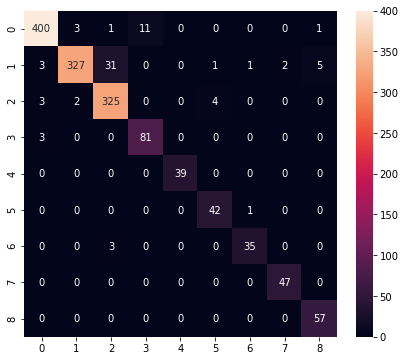

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       416
           1       0.98      0.88      0.93       370
           2       0.90      0.97      0.94       334
           3       0.88      0.96      0.92        84
           4       1.00      1.00      1.00        39
           5       0.89      0.98      0.93        43
           6       0.95      0.92      0.93        38
           7       0.96      1.00      0.98        47
           8       0.90      1.00      0.95        57

    accuracy                           0.95      1428
   macro avg       0.94      0.96      0.95      1428
weighted avg       0.95      0.95      0.95      1428



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Конвертация модели в сжатый формат
Tensorflow-Lite

In [16]:
# Сохранение модели
model.save(model_save_path, include_optimizer=False)

In [17]:
# Преобразование модели (квантование)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\aalap\AppData\Local\Temp\tmpskdfnoce\assets


6640

# Заключительный тест

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Получить I / O тензор
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Имплементация
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 2 ms


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[7.8009792e-02 4.7895694e-01 6.1799087e-06 1.2634621e-13 2.2314641e-16
 9.7494043e-16 1.3704908e-07 1.6888074e-13 4.4302696e-01]
1
